In [1]:
# Importing Libraris

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
import cv2 
import pickle
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

In [2]:
labels=pd.read_csv("Data_set_DataMining/Data_labels.csv")

In [3]:
# Loading Image Embeddings from saved npy array else create embeddings
try:
    imgArray=np.load('imgArray.npy')
    
except:
    imgArray=[]
    for i in range(1,517):
        path="./Data_set_DataMining/Images/IMG_"+str(i)+".jpg"
        im = cv2.imread(path)
        imgArray.append(cv2.resize(im, (224,224)))
        np.save('imgArray.npy',np.array(imgArray))

In [4]:
# Flat Images For Elbow method
flattenArray=list()
for i in range (0,len(imgArray)):
    flattenArray.append(np.array(imgArray[i].flatten()))

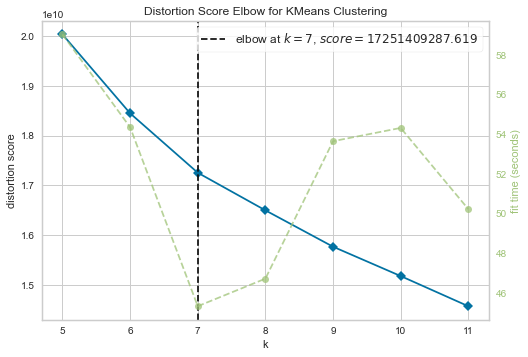

In [5]:
# Applying Elbow Method

try:
    filename = 'elbow_visualizer.sav'
    visualizer = pickle.load(open(filename, 'rb'))
    model = KMeans()
    visualizer.show()  
except:
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(5,12))
    visualizer.fit(np.array(flattenArray))        
    visualizer.show()
    filename = 'elbow_visualizer.sav'
    pickle.dump(visualizer, open(filename, 'wb'))


In [6]:
k=visualizer.elbow_value_
print(k)


7


# Data Sampling Using K-mean

In [7]:
model = KMeans(n_clusters=k,random_state=1).fit(np.array(flattenArray))
finalLabel = model.labels_

In [8]:
labels['assignedCluster']=finalLabel

In [9]:
# Data Sampling 70%
newDf=pd.DataFrame(columns=['Image_name','level','assignedCluster'])
tempSum=0
for kcluster in range(0,k):
    print('k is:',kcluster)
    tempdf=labels.loc[labels['assignedCluster']==kcluster]
    totalRows=len(tempdf)
    pickRow=round(totalRows*0.7)
    tempSum=tempSum+pickRow
    print(pickRow)
    newDf=newDf.append(tempdf[:pickRow])

k is: 0
55
k is: 1
41
k is: 2
57
k is: 3
59
k is: 4
62
k is: 5
43
k is: 6
44


In [10]:
newDf

,Image_name,level,assignedCluster
7,IMG_8,2,0
12,IMG_13,3,0
13,IMG_14,3,0
18,IMG_19,2,0
20,IMG_21,3,0
...,...,...,...
377,IMG_378,0,6
391,IMG_392,4,6
392,IMG_393,1,6
394,IMG_395,0,6


In [11]:
SampledDataEmbeddings=[]
tempdf=list()
for i in newDf['Image_name']:
    tempdf.append(imgArray[labels[labels['Image_name']==i].index.tolist()[0]])
    

In [12]:
SampledDataEmbeddings=np.array(tempdf)

In [13]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_tr, X_tst, y_tr, y_tst=train_test_split(newDf,newDf['level'])

In [14]:
# Reading sampled Data

flatten_X_tr=list()

EmbeddingsX_tr=[]
EmbeddingsX_tst=[]

for i in X_tr['Image_name']:
    path="./Data_set_DataMining/Images/"+i+".jpg"
    im = cv2.imread(path)
    EmbeddingsX_tr.append(cv2.resize(im, (224,224)))
    flatten_X_tr.append(cv2.resize(im, (224,224)).flatten())
    
flatten_X_tst=list()
for i in X_tst['Image_name']:
    path="./Data_set_DataMining/Images/"+i+".jpg"
    im = cv2.imread(path)
    EmbeddingsX_tst.append(cv2.resize(im, (224,224)))
    flatten_X_tst.append(cv2.resize(im, (224,224)).flatten())    

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Logistic Regression

In [16]:
from sklearn.metrics import f1_score, precision_score, recall_score


In [17]:
lr = LogisticRegression()
lr.fit(flatten_X_tr, y_tr.astype('int'))
    
y_pred_lr = lr.predict(flatten_X_tst)
logistic_regression_score = accuracy_score(y_tst.astype('int'), y_pred_lr)
print()
print("================== Report ==================")
print("F1 Score: ",f1_score(y_tst.astype('int'), y_pred_lr, average="macro"))
print("Precision Score: ",precision_score(y_tst.astype('int'), y_pred_lr, average="macro"))
print("Recall Score: ",recall_score(y_tst.astype('int'), y_pred_lr, average="macro"))
logisticScore=logistic_regression_score*100
print("Accuracy:",logistic_regression_score*100)


================== Report ==================
F1 Score:  0.3164865881847014
Precision Score:  0.35014005602240894
Recall Score:  0.30621009098428453
Accuracy: 40.65934065934066


In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
clf = DecisionTreeClassifier()
clf = clf.fit(flatten_X_tr,y_tr.astype('int'))
y_pred = clf.predict(flatten_X_tst)
score = accuracy_score(y_tst.astype('int'), y_pred_lr)
print()
print("================== Report ==================")
print("F1 Score: ",f1_score(y_tst.astype('int'), y_pred, average="macro"))
print("Precision Score: ",precision_score(y_tst.astype('int'), y_pred, average="macro"))
print("Recall Score: ",recall_score(y_tst.astype('int'), y_pred, average="macro"))
print("Accuracy:",score*100)


================== Report ==================
F1 Score:  0.29266585266585265
Precision Score:  0.2906640050656278
Recall Score:  0.2954022608216157
Accuracy: 40.65934065934066


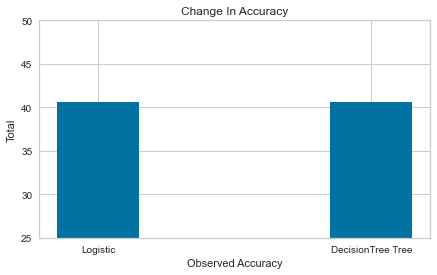

In [20]:
import matplotlib.pyplot as plt
  
graphData = {'Logistic':logistic_regression_score*100, 'DecisionTree Tree':score*100}

label = list(graphData.keys())
values = list(graphData.values())

fig = plt.figure(figsize = (7, 4))
plt.ylim(25,50)

# creating the bar plot
plt.bar(label, values,width = 0.3)
 
plt.title("Chang In Accuracy")
plt.ylabel("Total")
plt.xlabel("Observed Accuracy")
plt.title("Change In Accuracy")

plt.show()


In [21]:
inputDimension=np.shape(EmbeddingsX_tr[0].flatten())[0]
inputDimension

150528

# Without Imge Segmentation

# Ann

In [22]:
import torch
import torch.nn as nn
import tensorflow as tf

In [23]:
# ANN Artichture
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.linear1=nn.Linear(inputDimension,1024)
        self.linear2=nn.Linear(1024,1024) #input layer
        self.linear3=nn.Linear(1024,512) #hidden layers
        self.linear4=nn.Linear(512,124)
        self.linear5=nn.Linear(124,5) #output layer

    def forward(self,x):
        x=torch.relu(self.linear1(x))  
        x=torch.relu(self.linear2(x)) 
        x=torch.relu(self.linear3(x)) 
        x=torch.relu(self.linear4(x)) 
        x=self.linear5(x)
        return x

In [24]:
flatten_XTRAIN=[]
for i in range(0,len(EmbeddingsX_tr)):
    flatten_XTRAIN.append(EmbeddingsX_tr[i].flatten())

# converting to tensor
x_trainTensor=torch.tensor(flatten_XTRAIN)
Y_trainTensor=torch.tensor(np.array(y_tr, dtype=np.float16))


In [25]:
def train_loop(t,x_trainTensor,Y_trainTensor,model):
    y_pred = model(x_trainTensor.float())
    loss = criterion(y_pred, Y_trainTensor.long())
    print("Loss at epoch: ",t,"is: ",loss.item())
    
    model.zero_grad()
    loss.backward()
    optimizer.step()
    return loss.item()
    
def test_loop(flatten_X_tst,model):
    pred = model(torch.Tensor(flatten_X_tst))
    predicted=pred.argmax(1).numpy()
    count=0
    ytestTemp=np.array(y_tst)
    
    for i in range(0,len(predicted)):
        if predicted[i]==ytestTemp[i]:
            count=count+1
    correct = count/len(predicted)
    print(f"Accuracy: {(100*correct):>0.1f}%")
    print(predicted)




In [26]:
modelann=Net()

criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(modelann.parameters(), lr=1e-06)

In [27]:
loss_listANN=[]
for t in range(15):
    loss_listANN.append(train_loop(t,x_trainTensor,Y_trainTensor,modelann))
    test_loop(flatten_X_tst,modelann)
    print()

Loss at epoch:  0 is:  2.1382665634155273
Accuracy: 36.3%
[2 2 2 0 2 0 2 0 0 2 0 2 0 0 0 0 0 2 0 0 2 0 2 0 2 0 0 2 2 2 0 2 0 2 0 2 2
 0 2 0 0 0 0 0 2 2 0 0 2 0 0 0 2 0 2 0 0 0 0 0 0 2 2 2 0 2 0 2 0 2 2 2 0 2
 2 2 0 2 2 2 0 0 2 2 0 0 2 0 2 2 2]

Loss at epoch:  1 is:  1.422311782836914
Accuracy: 44.0%
[0 2 2 0 2 2 2 2 0 2 2 2 0 0 2 0 2 2 0 0 2 0 2 2 0 0 2 2 2 2 0 0 0 2 0 0 2
 2 2 0 0 0 2 0 2 2 0 0 2 2 2 0 0 0 2 0 0 2 0 0 2 2 2 2 2 2 2 2 2 2 0 2 0 2
 2 2 0 2 2 2 0 0 2 2 2 0 2 0 2 2 2]

Loss at epoch:  2 is:  1.3596638441085815
Accuracy: 38.5%
[2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 2 0 2 2 2 2 0 2 2 2 0 2 0 2 2 2]

Loss at epoch:  3 is:  1.3675951957702637
Accuracy: 36.3%
[0 0 0 0 3 0 2 0 0 2 0 3 0 0 3 0 3 0 0 0 3 0 0 2 0 0 2 2 2 3 0 0 0 2 0 0 2
 2 2 0 0 0 2 3 0 2 0 3 2 2 3 0 0 0 2 0 0 3 0 0 0 2 0 3 3 2 0 2 3 3 0 0 0 2
 2 2 0 2 2 0 0 0 0 0 2 0 2 0 2 0 2]

Loss at epoch:  4 is:

# Plotting Loss ANN 

In [28]:
# import matplotlib.pyplot as plt
# plt.ylabel("Loss")
# plt.xlabel("Epoch")
# plt.plot(np.array(loss_listANN))
# plt.show()

# CNN

In [29]:
class CNN(nn.Module):
#     inchanel:3  otchanel:8 ,kernalsize=3 stride,1 padding 1
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1=nn.Conv2d(3,6,5)  #convulation layers
        self.pool=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(6,16,5) 
        
        self.fc1=nn.Linear(16*53*53,1024)
        self.fc2=nn.Linear(1024,512)
        self.fc3=nn.Linear(512,124)
        self.fc4=nn.Linear(124,5)
        
    def forward(self,x):
        x=self.pool(torch.relu(self.conv1(x)))
        x=self.pool(torch.relu(self.conv2(x)))
        x=x.view(-1,16*53*53)
        x=torch.relu(self.fc1(x))
        x=torch.relu(self.fc2(x))
        x=torch.relu(self.fc3(x))
        x=self.fc4(x)

        return x

In [30]:
model2a=CNN()
model2a

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=44944, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=124, bias=True)
  (fc4): Linear(in_features=124, out_features=5, bias=True)
)

In [31]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model2a.parameters(), lr=1e-06)

In [32]:
Tempdata = np.array(EmbeddingsX_tr)
Tempdata=torch.Tensor(Tempdata)
x_t_cnn = Tempdata.permute(0,3,1,2)

data = np.array( EmbeddingsX_tst)
data=torch.Tensor(data)
xTestCNN = data.permute(0,3,1,2)

def train_loop2(t,x_t_cnn,model):
    y_pred = model(x_t_cnn)
    loss = criterion(y_pred, Y_trainTensor.long())
    print("Loss at epoch: ",t,"is: ",loss.item())
    
    model.zero_grad()
    loss.backward()
    optimizer.step()
    return loss.item()


def test_loop2(xTestCNN,model):
    pred = model(xTestCNN)
    predicted=pred.argmax(1).numpy()
    count=0
    ytestTemp=np.array(y_tst)
    
    for i in range(0,len(predicted)):
        if predicted[i]==ytestTemp[i]:
            count=count+1
    correct = count/len(predicted)
    print(f"Accuracy: {(100*correct):>0.1f}%")
    print(predicted)




In [33]:
loss_list_CNN = []
for t in range(15):
    loss_list_CNN.append(train_loop2(t,x_t_cnn,model2a))
    test_loop2(xTestCNN,model2a)


Loss at epoch:  0 is:  1.6500264406204224
Accuracy: 25.3%
[3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 0 0 0 3 0 0 3 0 0 0 0 0 0 3]
Loss at epoch:  1 is:  1.5836527347564697
Accuracy: 28.6%
[0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
Loss at epoch:  2 is:  1.5314700603485107
Accuracy: 29.7%
[0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0
 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0 0 2]
Loss at epoch:  3 is:  1.4928410053253174
Accuracy: 31.9%
[0 2 2 0 2 0 2 2 0 2 2 2 2 0 2 2 0 2 0 0 2 0 2 2 0 0 2 0 2 2 2 0 0 0 2 2 2
 2 0 2 0 2 2 0 2 2 0 2 2 0 0 0 0 2 2 2 0 2 0 2 0 2 0 0 2 2 2 2 2 0 0 2 0 2
 2 0 2 2 0 2 2 0 0 0 2 0 2 0 2 2 2]
Loss at epoch:  4 is:  1

In [34]:
# plt.ylabel("Loss")
# plt.xlabel("Epoch")
# plt.plot(np.array(loss_list_CNN))
# plt.show()

# Image Segmentation

In [35]:
def segmenImage(im):
#     img_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    kmeans = KMeans(n_clusters=3, random_state = 0, n_init=5).fit(im.flatten().reshape(-1, 1))
    centers = np.uint8(kmeans.cluster_centers_)
    segmented_data = centers[kmeans.labels_.flatten()]
    segmented_image = segmented_data.reshape((im.shape))
    return segmented_image

# CNN On Segmented Images

In [36]:
try:
    SegmentEmbeddingsX_tr=np.load("SegmentEmbeddingsX_tr.npy")
except:
    SegmentEmbeddingsX_tr=[]
    for i in range(len(EmbeddingsX_tr)):
        print(i)
        SegmentEmbeddingsX_tr.append(segmenImage(EmbeddingsX_tr[i]))
        np.save("SegmentEmbeddingsX_tr.npy",SegmentEmbeddingsX_tr)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269


In [37]:
# SegmentEmbeddingsX_tr.shape

In [38]:
model2=CNN()
model2

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=44944, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=124, bias=True)
  (fc4): Linear(in_features=124, out_features=5, bias=True)
)

In [39]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model2.parameters(), lr=1e-06)


In [40]:
try:
    SegmentEmbeddingsX_test=np.load("SegmentEmbeddingsX_test.npy")
except:
    SegmentEmbeddingsX_test=[]
    for i in range(len(EmbeddingsX_tst)):
        print(i)
        SegmentEmbeddingsX_test.append(segmenImage(EmbeddingsX_tst[i]))
        np.save("SegmentEmbeddingsX_test.npy",SegmentEmbeddingsX_test)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90


In [41]:
Tempdata = np.array(SegmentEmbeddingsX_tr)
Tempdata=torch.Tensor(Tempdata)
x_t_cnn = Tempdata.permute(0,3,1,2)

Tempdata = np.array(SegmentEmbeddingsX_test)
Tempdata=torch.Tensor(Tempdata)
x_tst_cnn = Tempdata.permute(0,3,1,2)

loss_list_CNN_Segmented = []
for t in range(15):
    loss_list_CNN_Segmented.append(train_loop2(t,x_t_cnn,model2))
    test_loop2(x_tst_cnn,model2)


Loss at epoch:  0 is:  1.6714547872543335
Accuracy: 24.2%
[3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 3 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 2 0 2 0 0 0]
Loss at epoch:  1 is:  1.560408353805542
Accuracy: 39.6%
[3 0 2 2 2 2 2 2 2 2 2 0 0 2 2 0 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 0 2 2 2 0 2 2 2 2 2 0 2 0 2 2 2 0 2
 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2]
Loss at epoch:  2 is:  1.4885871410369873
Accuracy: 35.2%
[0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Loss at epoch:  3 is:  1.4498435258865356
Accuracy: 35.2%
[0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Loss at epoch:  4 is:  1.

In [42]:
# plt.ylabel("Loss")
# plt.xlabel("Epoch")
# plt.plot(np.array(loss_list_CNN_Segmented))
# plt.show()

# ANN On Segmented Image

In [43]:
model3=Net()
model3

Net(
  (linear1): Linear(in_features=150528, out_features=1024, bias=True)
  (linear2): Linear(in_features=1024, out_features=1024, bias=True)
  (linear3): Linear(in_features=1024, out_features=512, bias=True)
  (linear4): Linear(in_features=512, out_features=124, bias=True)
  (linear5): Linear(in_features=124, out_features=5, bias=True)
)

In [44]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model3.parameters(), lr=1e-06)

In [45]:
Tempdata = np.array(SegmentEmbeddingsX_tr)
FlatSegmentEmbeddingsX_tr=[]
for i in range(0,len(Tempdata)):
    FlatSegmentEmbeddingsX_tr.append(Tempdata[i].flatten())
x_trainTensor_Segmented=torch.Tensor(FlatSegmentEmbeddingsX_tr)


Tempdata = np.array(SegmentEmbeddingsX_test)
FlatSegmentEmbeddingsX_test=[]
for i in range(0,len(Tempdata)):
    FlatSegmentEmbeddingsX_test.append(Tempdata[i].flatten())
x_testTensor_Segmented=torch.Tensor(FlatSegmentEmbeddingsX_test)



In [46]:
loss_listANN_Segmented=[]
for t in range(15):
    loss_listANN_Segmented.append(train_loop(t,x_trainTensor_Segmented,Y_trainTensor,model3))
    test_loop(x_testTensor_Segmented,model3)
    print()

Loss at epoch:  0 is:  1.8222291469573975
Accuracy: 27.5%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Loss at epoch:  1 is:  1.6839511394500732
Accuracy: 35.2%
[0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]

Loss at epoch:  2 is:  1.6245566606521606
Accuracy: 35.2%
[0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2]

Loss at epoch:  3 is:  1.4131739139556885
Accuracy: 37.4%
[0 2 0 0 0 3 2 3 0 2 3 3 0 0 3 2 2 0 0 0 2 0 0 2 0 0 2 2 2 2 2 0 0 2 2 0 2
 2 2 2 0 0 2 2 2 2 0 0 0 2 2 0 0 0 2 0 0 3 0 0 4 2 0 3 3 2 2 2 2 2 0 3 0 2
 2 2 0 2 2 0 0 0 2 0 2 0 2 0 2 3 0]

Loss at epoch:  4 is

In [47]:
# plt.ylabel("Loss")
# plt.xlabel("Epoch")
# plt.plot(np.array(loss_listANN_Segmented))
# plt.show()

In [48]:
import matplotlib.pyplot as plt

# Combined Analysis OF Loss

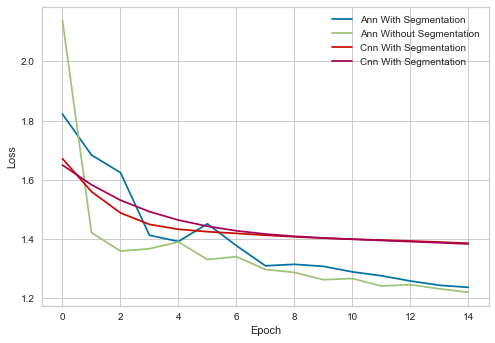

In [49]:
plt.ylabel("Loss")
plt.xlabel("Epoch")

plt.plot(np.array(loss_listANN_Segmented))
plt.plot(np.array(loss_listANN))
plt.plot(np.array(loss_list_CNN_Segmented))
plt.plot(np.array(loss_list_CNN))

plt.legend(['Ann With Segmentation','Ann Without Segmentation','Cnn With Segmentation','Cnn With Segmentation'])

plt.show()
